In [248]:
 import pandas as pd

In [249]:
from matplotlib import pyplot as plt
import numpy as np


In [250]:
df = pd.read_csv('WHO.csv')

Question 1

In [251]:
selected_columns = ['Country', 'CountryID', 'Continent',
                     'Gross national income per capita (PPP international $)',
                     'Population (in thousands) total',
                     'Population annual growth rate (%)']

In [252]:
north_america_df = df[df['Continent'] == 4]
north_america_df.dropna(subset=['Population annual growth rate (%)'], inplace=True)

C:\Users\kadel\AppData\Local\Temp\ipykernel_10236\504710022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america_df.dropna(subset=['Population annual growth rate (%)'], inplace=True)


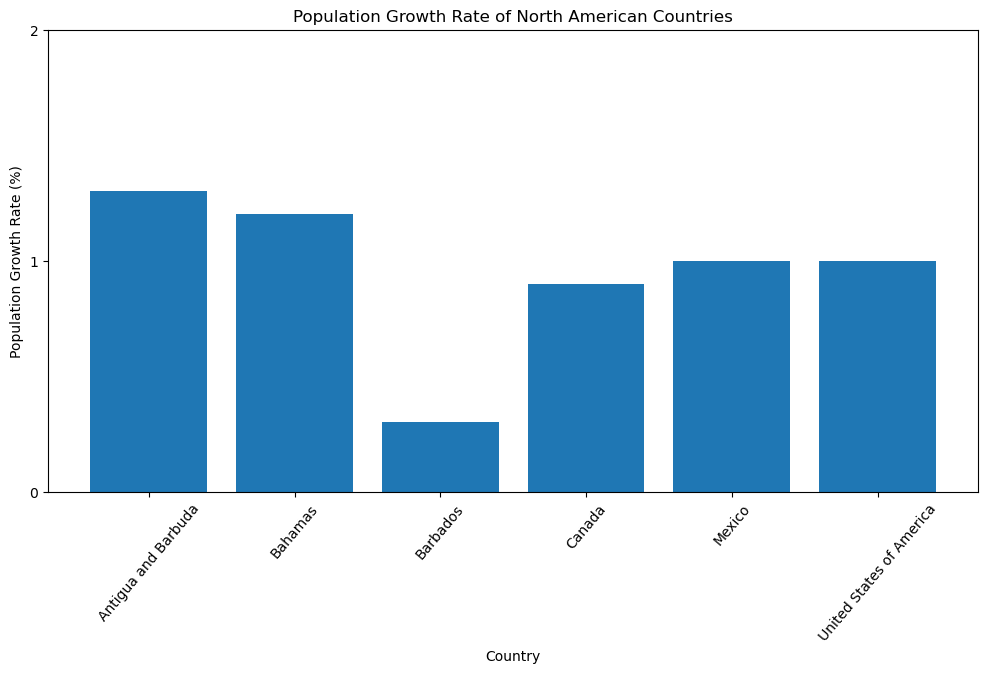

In [253]:
plt.figure(figsize=(12, 6))
plt.bar(north_america_df['Country'], north_america_df['Population annual growth rate (%)'])

#Graphics for the bar graph
plt.xlabel('Country')
plt.ylabel('Population Growth Rate (%)')
plt.title('Population Growth Rate of North American Countries')
plt.xticks(rotation=50)  
plt.yticks(np.arange(0, 3, 1))

plt.show()

Question 2

C:\Users\kadel\AppData\Local\Temp\ipykernel_10236\2475545893.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_countries = top_countries.append({'Country': 'Other', 'Population (in thousands) total': other_population}, ignore_index=True)


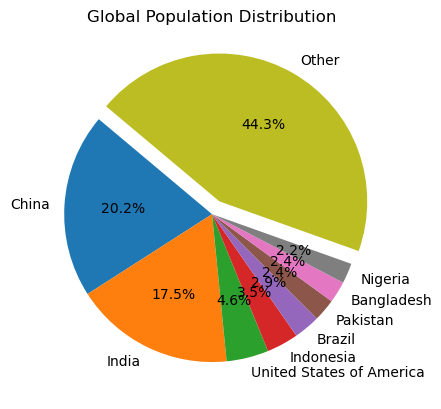

In [254]:
top_countries = df.nlargest(8, 'Population (in thousands) total')
other_population = df['Population (in thousands) total'].sum() - top_countries['Population (in thousands) total'].sum()
#Creates 'other' as a piece
top_countries = top_countries.append({'Country': 'Other', 'Population (in thousands) total': other_population}, ignore_index=True)
#Explodes the other piece.
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.1)  
#Piechart creation
plt.pie(top_countries['Population (in thousands) total'], labels=top_countries['Country'], autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Global Population Distribution')
plt.show()

Question 3

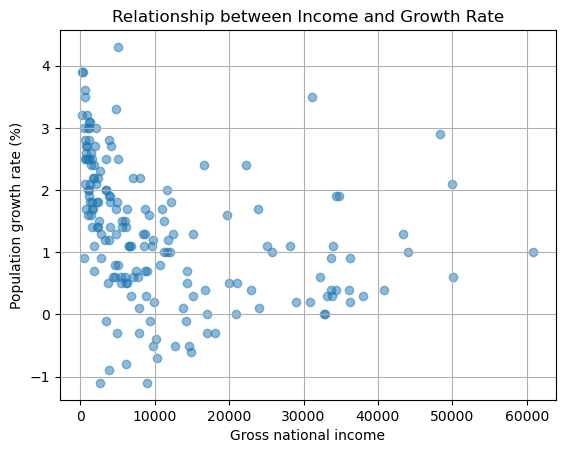

In [255]:
selected_columns = ['Gross national income per capita (PPP international $)', 'Population annual growth rate (%)']
df_filtered = df[selected_columns]

#Creation of Scatter Plot
plt.scatter(df_filtered[selected_columns[0]], df_filtered[selected_columns[1]], alpha=0.5)
plt.xlabel('Gross national income')
plt.ylabel('Population growth rate (%)')
plt.title('Relationship between Income and Growth Rate')

plt.grid(True)
plt.show()

Question 4

The scatterplot is skewed more to the left-most area. The direction seems to go from the top left to the bottom right, as the points spread out more the longer it goes on. It's strength is pretty positive as the dots are compact together for the most part. There are a few outliers that exist beyond the general trend of the dots.Caused by countries with low income but high population growth.

Question 5

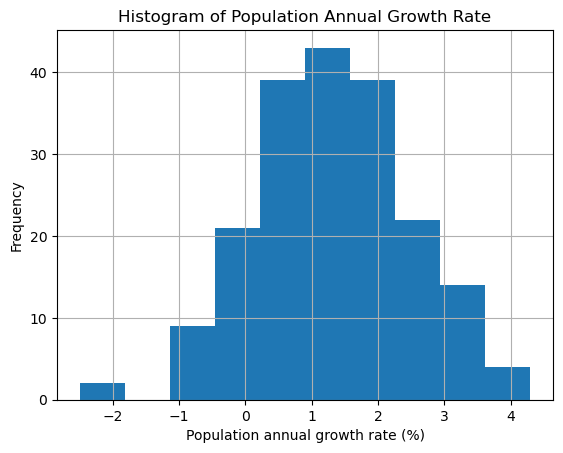

In [256]:
population_growth_rate = df['Population annual growth rate (%)']
#Histogram creation
plt.hist(population_growth_rate)

plt.xlabel('Population annual growth rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Population Annual Growth Rate')

plt.grid(True)
plt.show()

The center of the data is the peak of it as well, as it's highest there. The spread shows that it is unevenly distributed, with it's range ranging from as low as 0, to as high as 25. The shape is that of a piramid in the center where the maximum values are, and there is one outlier on the left.

Question 6

Most countries have slow to moderate population growth, but there are a few standout countries where the population is growing exceptionally quickly. This is where the histogram is at it's peak in the middle. It curves downwards in a slope on either side. There is a lone datapoint on the left, this is an outlier, as it is not connected to the other data.

Question 7

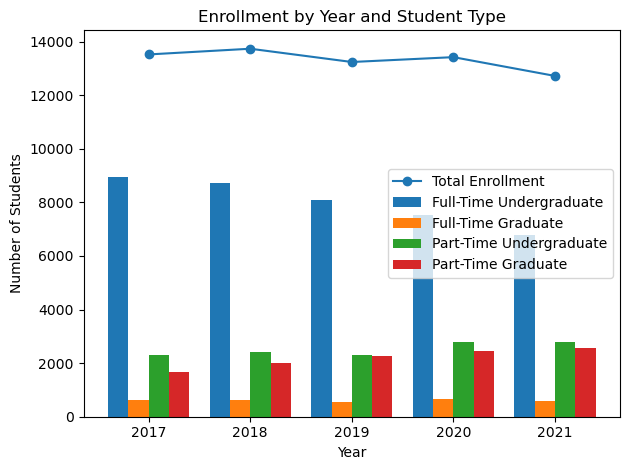

In [257]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Year': [2017, 2018, 2019, 2020, 2021],
    'Full-Time Undergraduate': [8938, 8728, 8090, 7528, 6781],
    'Full-Time Graduate': [640, 611, 552, 652, 575],
    'Part-Time Undergraduate': [2291, 2407, 2321, 2803, 2788],
    'Part-Time Graduate': [1651, 1987, 2275, 2436, 2574]
}
years = data['Year']
ft_undergraduate = data['Full-Time Undergraduate']
ft_graduate = data['Full-Time Graduate']
pt_undergraduate = data['Part-Time Undergraduate']
pt_graduate = data['Part-Time Graduate']

#Summing the enrollments together for all students
total_enrollment = [sum(values) for values in zip(ft_undergraduate, ft_graduate, pt_undergraduate, pt_graduate)]


#Grouped bar plots
plt.bar(x - bar_width * 1.5, ft_undergraduate, width=bar_width, label='Full-Time Undergraduate')
plt.bar(x - bar_width * 0.5, ft_graduate, width=bar_width, label='Full-Time Graduate')
plt.bar(x + bar_width * 0.5, pt_undergraduate, width=bar_width, label='Part-Time Undergraduate')
plt.bar(x + bar_width * 1.5, pt_graduate, width=bar_width, label='Part-Time Graduate')

#Top line plot showcasing the overall
plt.plot(x, total_enrollment, marker='o', label='Total Enrollment')

#Adding labels
plt.xticks(x, years)
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Enrollment by Year and Student Type')
plt.legend()


plt.tight_layout()
plt.show()


Question 8

The bar chart showcases a trend of fairly constant data. In each year, Full-Time Undergraduates are always the highest on the chart. There are much more of them than any of the other contenders. On the contrary, Full-Time Graduates are always the smallest dataset. They are the lowest on the chart. While Part-Time Graduates and Undergraduates are usually neck and neck. 

If we look at the line graph, we can very well notice a slow decline in total overall enrollment. We can assume that some outside job related factor is what is making our data slowly decrease. Our line graph shows a much more straight forwward dataset, taking the average of our bar graph. As opposed to how our bar graph shows different principals within itself. 

As stated, the consistancy is very simmilar. Despite the overall decrease, Full-Time-Undergrads will always be the peak of the dataset. While Full-Time Grads will always be the smallest percentage. So we we loose more employed students overall from 2017 to 2021, we still have nearly the same percentages when breaking down the data. This preposes that there is an overall lack of interest in employment, rather than any one group contributing more or less.

Question 9

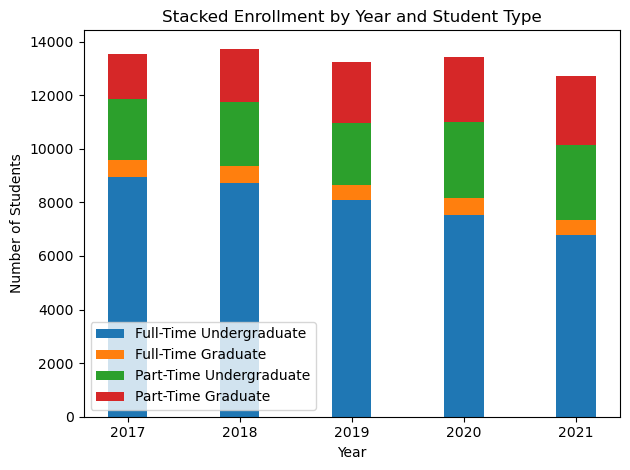

In [258]:

#Bar plots being stacked upon each other as opposed to the previous graph
bar_width = 0.35
plt.bar(x, ft_undergraduate, width=bar_width, label='Full-Time Undergraduate')
plt.bar(x, ft_graduate, width=bar_width, bottom=ft_undergraduate, label='Full-Time Graduate')
plt.bar(x, pt_undergraduate, width=bar_width, bottom=np.array(ft_undergraduate) + np.array(ft_graduate), label='Part-Time Undergraduate')
plt.bar(x, pt_graduate, width=bar_width, bottom=np.array(ft_undergraduate) + np.array(ft_graduate) + np.array(pt_undergraduate), label='Part-Time Graduate')

#Labeling
plt.xticks(x, years)
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Stacked Enrollment by Year and Student Type')
plt.legend()

plt.tight_layout()
plt.show()


Question 10

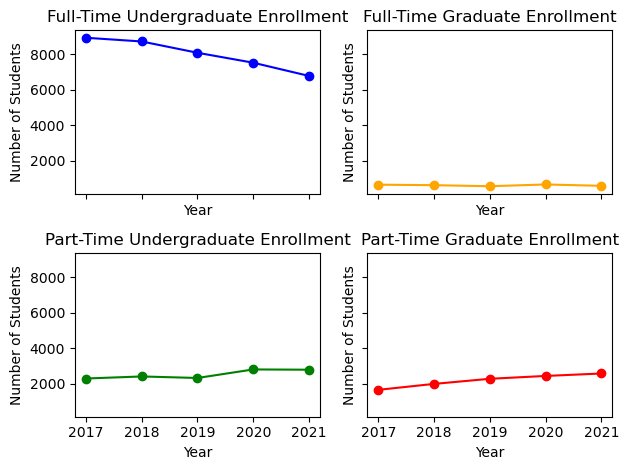

In [259]:
#Creating a figure with four sub plots, allows us to see each datapoint in depth. Showing each one's own incline and decline up close
fig, axes = plt.subplots(2, 2, sharex= True, sharey = True)

#Subplot 1: Full-Time Undergraduate
axes[0, 0].plot(years, ft_undergraduate, marker='o', color='blue')
axes[0, 0].set_title('Full-Time Undergraduate Enrollment')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Students')

#Subplot 2: Full-Time Graduate
axes[0, 1].plot(years, ft_graduate, marker='o', color='orange')
axes[0, 1].set_title('Full-Time Graduate Enrollment')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Students')

#Subplot 3: Part-Time Undergraduate
axes[1, 0].plot(years, pt_undergraduate, marker='o', color='green')
axes[1, 0].set_title('Part-Time Undergraduate Enrollment')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Students')

#Subplot 4: Part-Time Graduate
axes[1, 1].plot(years, pt_graduate, marker='o', color='red')
axes[1, 1].set_title('Part-Time Graduate Enrollment')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Students')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor).
- DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.
- If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else.
By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work.

Kade Levy